In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import json

plt.style.use('classic')

mmaxstr = '$M_{max}$'

# Aplikace transformace

file_path = "knn_normal_speed-24-05-05,09:01.json"
# Load JSON data from file
with open(file_path, 'r') as file:
    data_dict = json.load(file)

# Load data into Python Dictionary

# Convert to DataFrame
df = pd.DataFrame(data_dict['benchmarks'])
# filter only run_type == aggregate
df = df.loc[df['run_type'] == "aggregate"]
df = df.loc[df['name'].str.endswith("mean")]

df["number_points"] = df["name"].str.extract(r'/(\d+)/', expand=False)
df["number_points"] = (df["number_points"]).fillna(0).astype(int)
df["M_max"] = df["name"].str.extract(r'/\d+/(\d+)')
df["M_max"] = (df["M_max"]).fillna(0).astype(int)
df["type"] = df["name"].str.extract('([a-zA-Z]+)/')

df_first = df[df['type'] == 'nnNormalFirst']
df_leaf = df[df['type'] == 'nnNormalLeaf']
df_Iterator = df[df['type'] == 'nnNormalIterator']


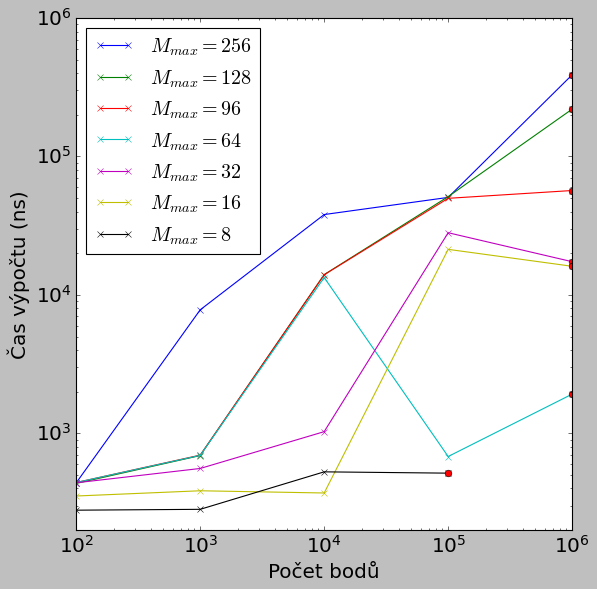

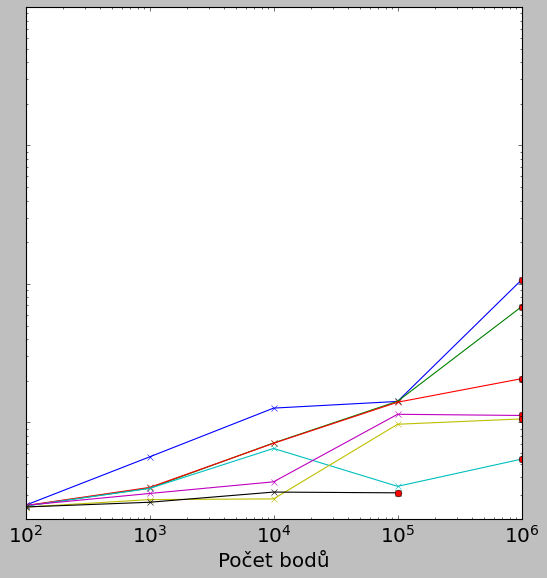

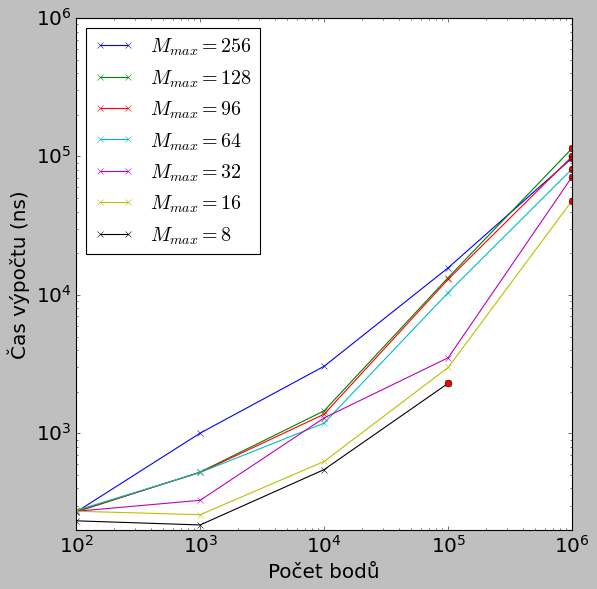

In [68]:
for df_tmp, name in zip([df_first, df_leaf, df_Iterator], ['nnNormalFirst', 'nnNormalLeaf', 'nnNormalIterator']):
    fig, ax = plt.subplots(figsize=(8, 8))

    m_max_values = sorted(df_tmp['M_max'].unique(), reverse=True)
    for i in m_max_values:
        tmp_df = df_tmp.loc[df_tmp['M_max'] == i]
        if not tmp_df.empty:
            ax.plot(tmp_df['number_points'], tmp_df['real_time'], '-x', label=f"{mmaxstr}$= {i}$")
            ax.plot(tmp_df['number_points'].iloc[-1], tmp_df['real_time'].iloc[-1], 'o', color="r")

    ax.set_ylabel('Čas výpočtu (ns)', fontsize=18)
    # ax.set_title('Čas výpočtu by M_max and Number of Points')
    ax.set_xticks(df_tmp['number_points'].unique())  # Nastaví ticks na ose X
    ax.set_xlabel('Počet bodů', fontsize=18)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    plt.ylim(10**2.3, 10**6)

    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    if name == 'nnNormalLeaf':
        ax.get_yaxis().set_ticklabels([])
        ax.set_ylabel('', fontsize=18)
    else:
        ax.legend(loc='upper left', fontsize=18)
    plt.savefig(f'benchmark_nn_normal_speed_{name}.pdf', bbox_inches='tight')


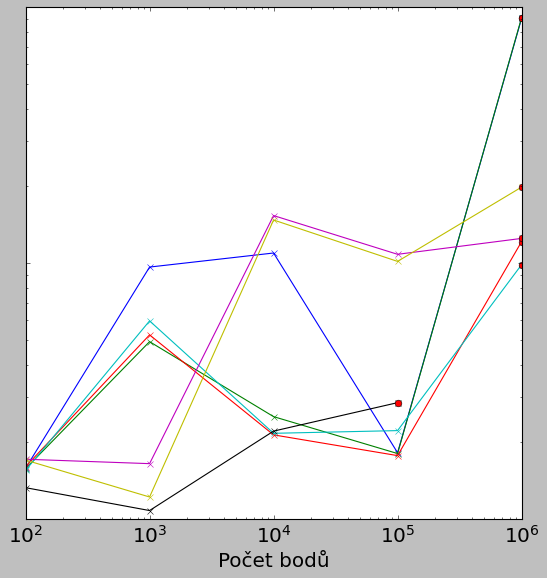

In [69]:
fig, ax = plt.subplots(figsize=(8, 8))

m_max_values = sorted(df_tmp['M_max'].unique(), reverse=True)
for i in m_max_values:
    tmp_df = df_tmp.loc[df_tmp['M_max'] == i]
    if not tmp_df.empty:
        ax.plot(tmp_df['number_points'], tmp_df['interator build(ns)'], '-x', label=f"{mmaxstr}$= {i}$")
        ax.plot(tmp_df['number_points'].iloc[-1], tmp_df['interator build(ns)'].iloc[-1], 'o', color="r")

# ax.set_ylabel('Čas výpočtu (ns)', fontsize=18)
# ax.set_title('Čas výpočtu by M_max and Number of Points')
ax.set_xticks(df_tmp['number_points'].unique())  # Nastaví ticks na ose X
ax.set_xlabel('Počet bodů', fontsize=18)
ax.set_xscale('log')
ax.set_yscale('log')

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

ax.get_yaxis().set_ticklabels([])
# ax.legend(loc='upper left', fontsize=18)
plt.savefig('benchmark_nn_normal_speed_iterator.pdf', bbox_inches='tight')

